# ML Classification task

In [1]:
import sys
import pandas as pd
from pprint import pprint

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score


sys.path.append('../')
from src.utility import (
    train_timer,
    fit_eval,
    print_metrics,
    plot_evaluation_graphs,
    train_set_evaluation,
    plot_accuracy
)

In [2]:
titanic_train = pd.read_csv('../data/processed/titanic_train.csv')
titanic_test = pd.read_csv('../data/processed/titanic_test.csv')
titanic_dev = pd.read_csv('../data/processed/titanic_dev.csv')

In [3]:
X_train = titanic_train.drop(columns=['Pass__Survived'])
Y_train = titanic_train['Pass__Survived']

X_test = titanic_test.drop(columns=['Pass__Survived'])
Y_test = titanic_test['Pass__Survived']

X_dev = titanic_dev.drop(columns=['Pass__Survived'])
Y_dev = titanic_dev['Pass__Survived']

## Train and evaluate the classification model

In [4]:
RandomForest = RandomForestClassifier(
    n_estimators=10, 
    max_depth=5,
    random_state=18
)

# Train the model
RandomForest.fit(X_train, Y_train)

# Evaluate the model on the training, development and test sets
Yhat_train = RandomForest.predict(X_train)
Yhat_dev = RandomForest.predict(X_dev)
Yhat_test = RandomForest.predict(X_test)
accuracy_train = accuracy_score(Y_train, Yhat_train)
accuracy_dev = accuracy_score(Y_dev, Yhat_dev)
accuracy_test = accuracy_score(Y_test, Yhat_test)
print(f'Accuracy (train): {accuracy_train:.3f}')
print(f'Accuracy (dev): {accuracy_dev:.3f}')
print(f'Accuracy (test): {accuracy_test:.3f}')

Accuracy (train): 0.859
Accuracy (dev): 0.825
Accuracy (test): 0.765


In [5]:
# Perform Grid Search
# Concatenate train and dev sets for cross-validation
X_train_cv = pd.concat([X_train, X_dev])
Y_train_cv = pd.concat([Y_train, Y_dev])

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Grid Search with cross validation
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=18),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the grid search
grid_search.fit(X_train_cv, Y_train_cv)

# Print best parameters and score
print('Best parameters:')
pprint(grid_search.best_params_)
print(f"Best cross-validation accuracy: {grid_search.best_score_:.3f}")

# Evaluate best model on test
best_model = grid_search.best_estimator_
test_accuracy = accuracy_score(Y_test, best_model.predict(X_test))
print(f"Test set accuracy with best model: {test_accuracy:.3f}")


Best parameters:
{'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 200}
Best cross-validation accuracy: 0.844
Test set accuracy with best model: 0.777


## Random Forest Classifier

Model training time: 98.54 ms
------------- MODEL METRICS --------------
Accuracy: 0.87
Precision: 0.85
Recall: 0.84
Specificity: 0.89


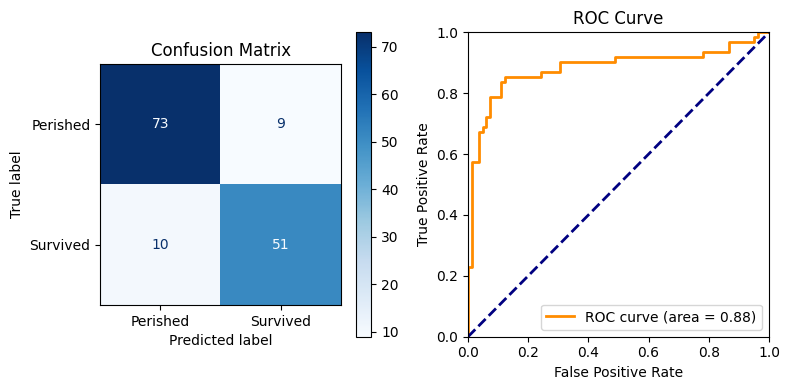

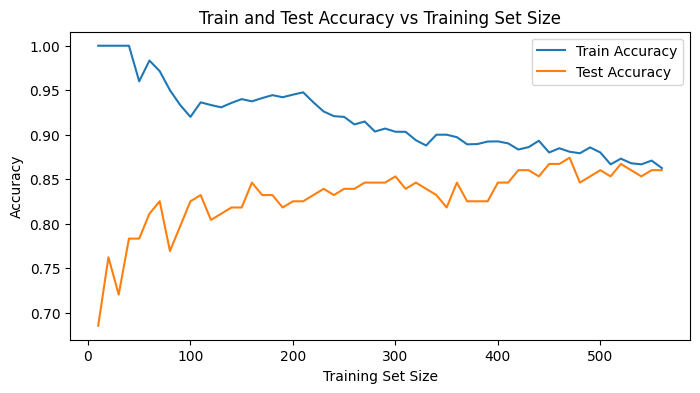

In [6]:
RandomForest = RandomForestClassifier(
    n_estimators=100, 
    max_depth=5,
    random_state=18
)

train_timer(RandomForest, X_train, Y_train)
Yhat, Yhat_prob, metrics = fit_eval(
    RandomForest,
    X_dev,
    Y_dev
)
print_metrics(metrics)
plot_evaluation_graphs(Y_dev, Yhat, Yhat_prob)
train_eval = train_set_evaluation(
    RandomForest,
    X_train,
    Y_train,
    X_dev,
    Y_dev
)
plot_accuracy(train_eval)

## Logistic Regression

Model training time: 47.17 ms
------------- MODEL METRICS --------------
Accuracy: 0.80
Precision: 0.76
Recall: 0.77
Specificity: 0.82


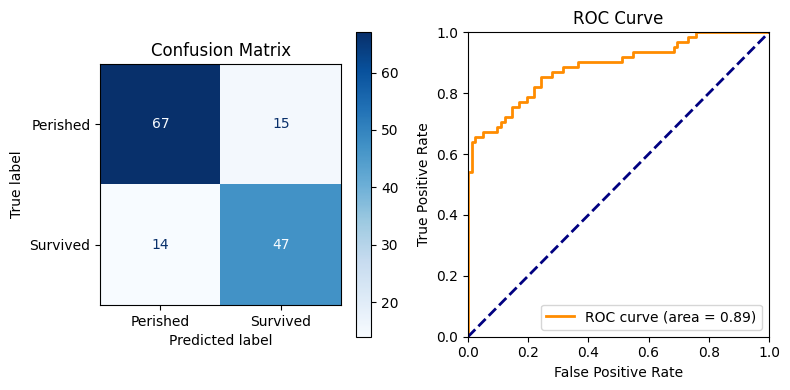

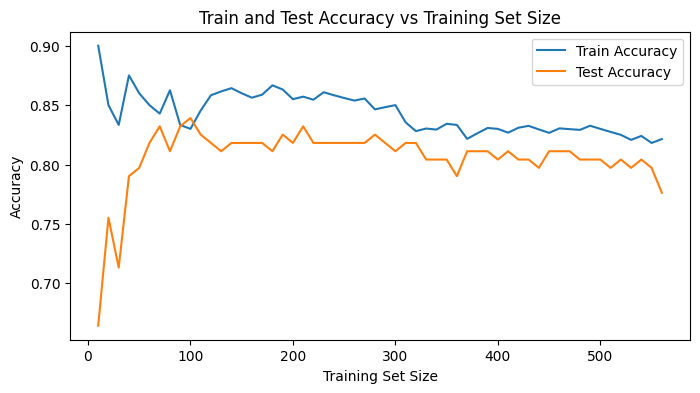

In [7]:
LogReg = LogisticRegression(max_iter=500)

train_timer(LogReg, X_train, Y_train)
Yhat, Yhat_prob, metrics = fit_eval(
    LogReg,
    X_dev,
    Y_dev
)
print_metrics(metrics)
plot_evaluation_graphs(
    Y_dev,
    Yhat,
    Yhat_prob
)
train_eval = train_set_evaluation(
    LogReg,
    X_train,
    Y_train,
    X_dev,
    Y_dev
)
plot_accuracy(train_eval)

## Decision Tree

Model training time: 3.38 ms
------------- MODEL METRICS --------------
Accuracy: 0.78
Precision: 0.72
Recall: 0.77
Specificity: 0.78


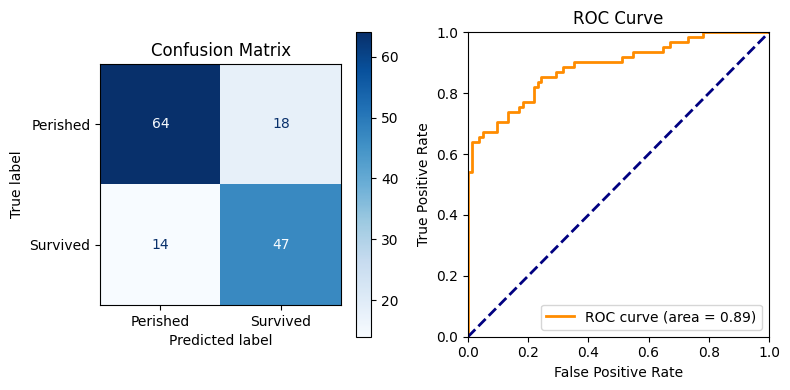

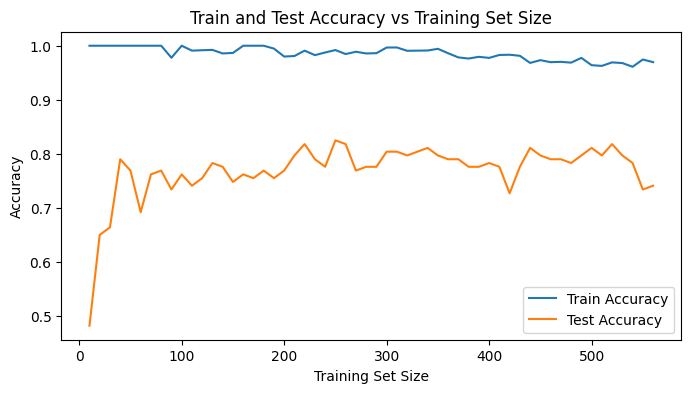

In [8]:
DecisionTree = DecisionTreeClassifier(
    max_depth=10,
    random_state=18
)

train_timer(DecisionTree, X_train, Y_train)
Yhat, Yhat_prob, metrics = fit_eval(
    LogReg,
    X_dev,
    Y_dev
)
print_metrics(metrics)
plot_evaluation_graphs(Y_dev, Yhat, Yhat_prob)
train_eval = train_set_evaluation(
    DecisionTree,
    X_train,
    Y_train,
    X_dev,
    Y_dev
)
plot_accuracy(train_eval)
